## Data analysis task

### Part 1 : Distributions
- The purpose is to do analysis of data distribution by identifying
    - Types of distributions
    - Values
    - Skewness
    - Outliers
    - Modalities

### Import libraries

In [1]:
install.packages('corrplot')
library(corrplot)
library(tidyverse)


The downloaded binary packages are in
	/var/folders/71/32h8kjzx1d957cbl0_xhpyvr0000gn/T//RtmpyY7kbR/downloaded_packages


corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 14, repr.plot.height = 7) # set plot size

### Load data

- The dataset consists of patients details with some of them having heart disease. There are 12 columns in the dataset namely
    - Age : age of the patient in years
    - Sex : sex of the patient (M: Male, F: Female)
    - ChestPainType : chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
    - RestingBP : resting blood pressure in mm Hg
    - Cholesterol : serum cholesterol in mm/dl
    - FastingBS : fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
    - RestingECG : resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
    - MaxHR : maximum heart rate achieved
    - ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
    - Oldpeak: oldpeak measured in depression
    - ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
    - HeartDisease: output class (1: heart disease, 0: Normal)

In [3]:
heart <- read.csv('~/Downloads/heart.csv')
head(heart)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


### Transform data

In [4]:
heart %>% 
mutate(
    HeartDisease = case_when(
        HeartDisease == 0 ~ 'No',
        HeartDisease == 1 ~ 'Yes'
    )
) %>% 
mutate_if(is.character, as.factor) -> heart

head(heart)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,No


### Discrete distribution

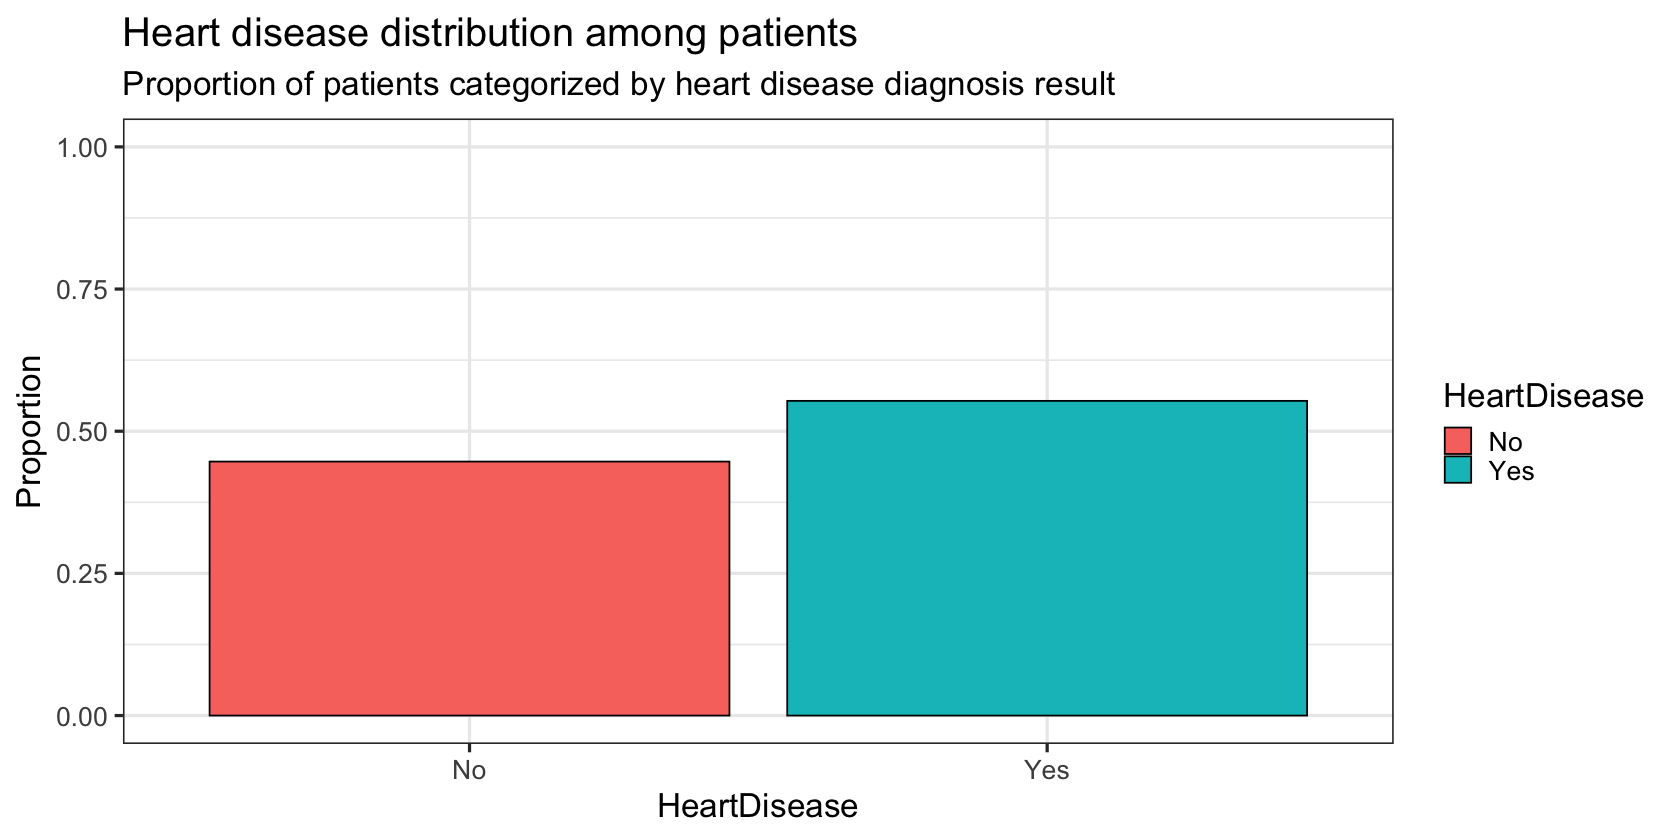

In [5]:
heart %>%
group_by(HeartDisease) %>%
summarise(n = n()) %>%
mutate(Proportion = n / sum(n)) %>%
ggplot(mapping = aes(x = HeartDisease, y = Proportion, fill = HeartDisease)) + 
geom_col(color = 'black') + 
ggtitle(
    'Heart disease distribution among patients',
    subtitle = 'Proportion of patients categorized by heart disease diagnosis result'
) +
ylim(0, 1) +
theme_bw(base_size = 20)

**Observation**
- The patients were diagonised as either having heart disease `(HeartDisease = Yes)` or not having heart disease `(HeartDisease = No)` which means there are 2 possible outcomes regarding to heart disease diagnosis
- If we randomly pick `n` patients (duplicate patients are allowed), probability of getting `k` patients with heart disease where `k <= n` follows `binomial distribution` because the probability of getting heart disease patient `(p)` which equals to `0.55` (from data) stays `constant` accross the picks
- however, if randomly pick `n` patients and did not allow a patient to be picked more than once, the probability of getting `k` patients with heart disease where `k <= n` follows `hypergeometric distribution` as the probability of getting heart disease patient `vary` accross the picks

### Continuous distribution

In [6]:
heart %>% 
group_by(HeartDisease) %>% 
summarise(
    min = min(RestingBP),
    q1 = quantile(RestingBP, 0.25),
    mean = mean(RestingBP),
    median = median(RestingBP),
    q3 = quantile(RestingBP, 0.75),
    iqr = IQR(RestingBP),
    max = max(RestingBP),
) 

HeartDisease,min,q1,mean,median,q3,iqr,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
No,80,120,130.1805,130,140,20,190
Yes,0,120,134.1850,132,145,25,200


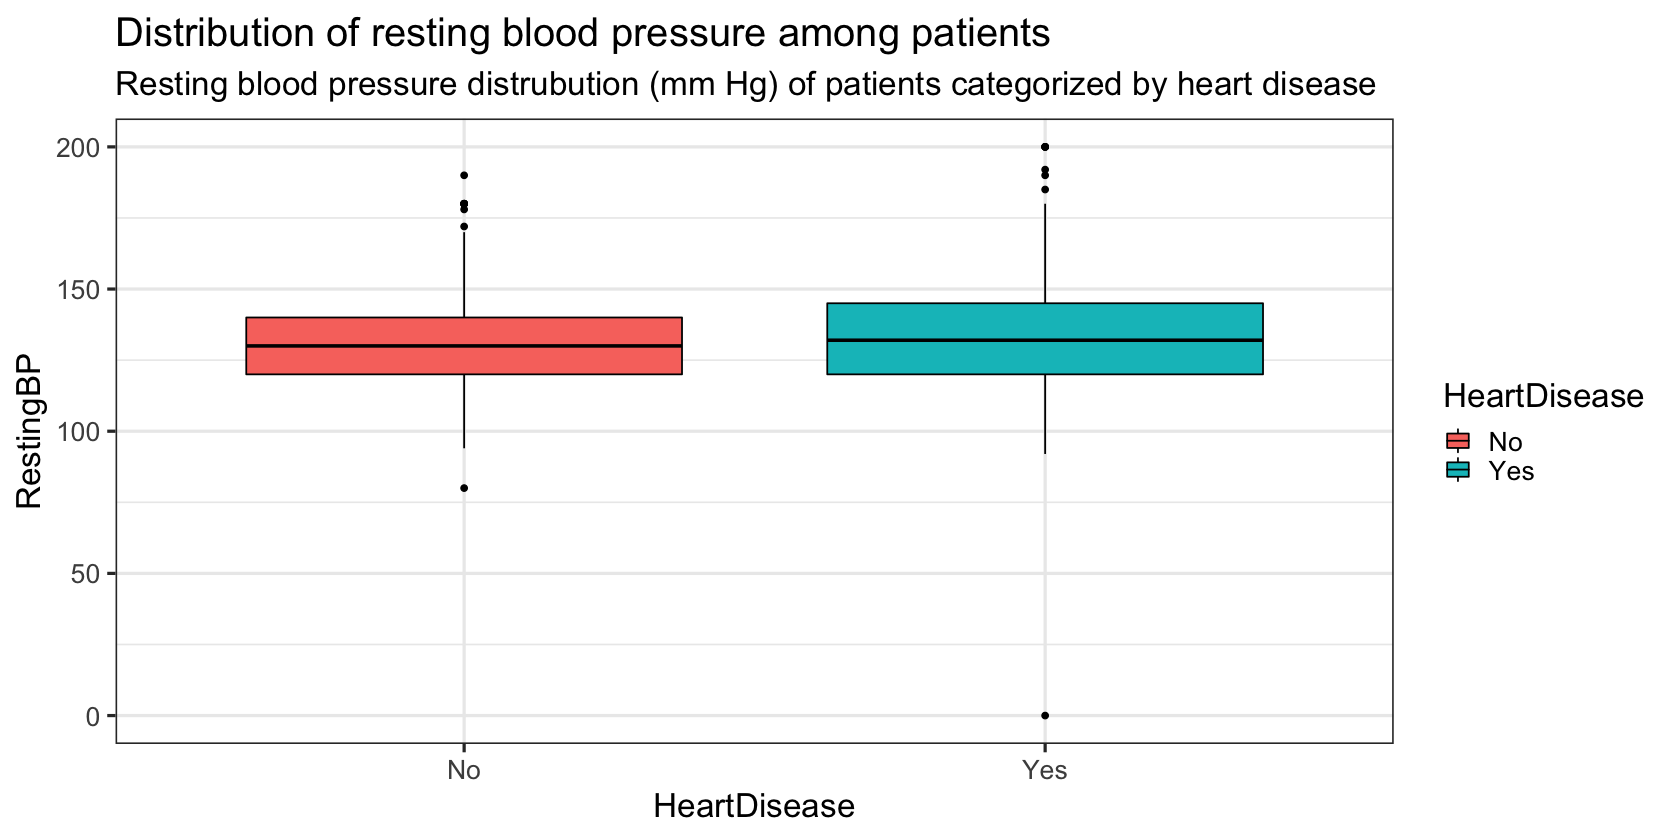

In [7]:
ggplot(heart, mapping = aes(x = HeartDisease, y = RestingBP, fill = HeartDisease)) + 
geom_boxplot(color = 'black') +
ggtitle(
    'Distribution of resting blood pressure among patients',
    subtitle = 'Resting blood pressure distrubution (mm Hg) of patients categorized by heart disease'
) +
theme_bw(base_size = 20)

**Observation**
- Resting blood pressure (RestingBP) variable has outliers (extreme values) in both upper and lower sides of box plot regardless of heart disease, where majority of the extreme resting blood pressure have high value
- It is clearer from box plot that the outliers on the lower end are merely minimum values of resting blood pressure observed for each diagnosis result group
- Minimum RestingBP for healty group is `80 mm Hg`. Surprisingly, heart disease patient group has the minimum resting blood pressure of `0 mm Hg` which looks unusual and could indicate error during data collection. The maximum RestingBP of both groups are not notably diffferent `(10 mm Hg)`. Additionally, the central portion of resting blood pressure for heart disease group is more spread out

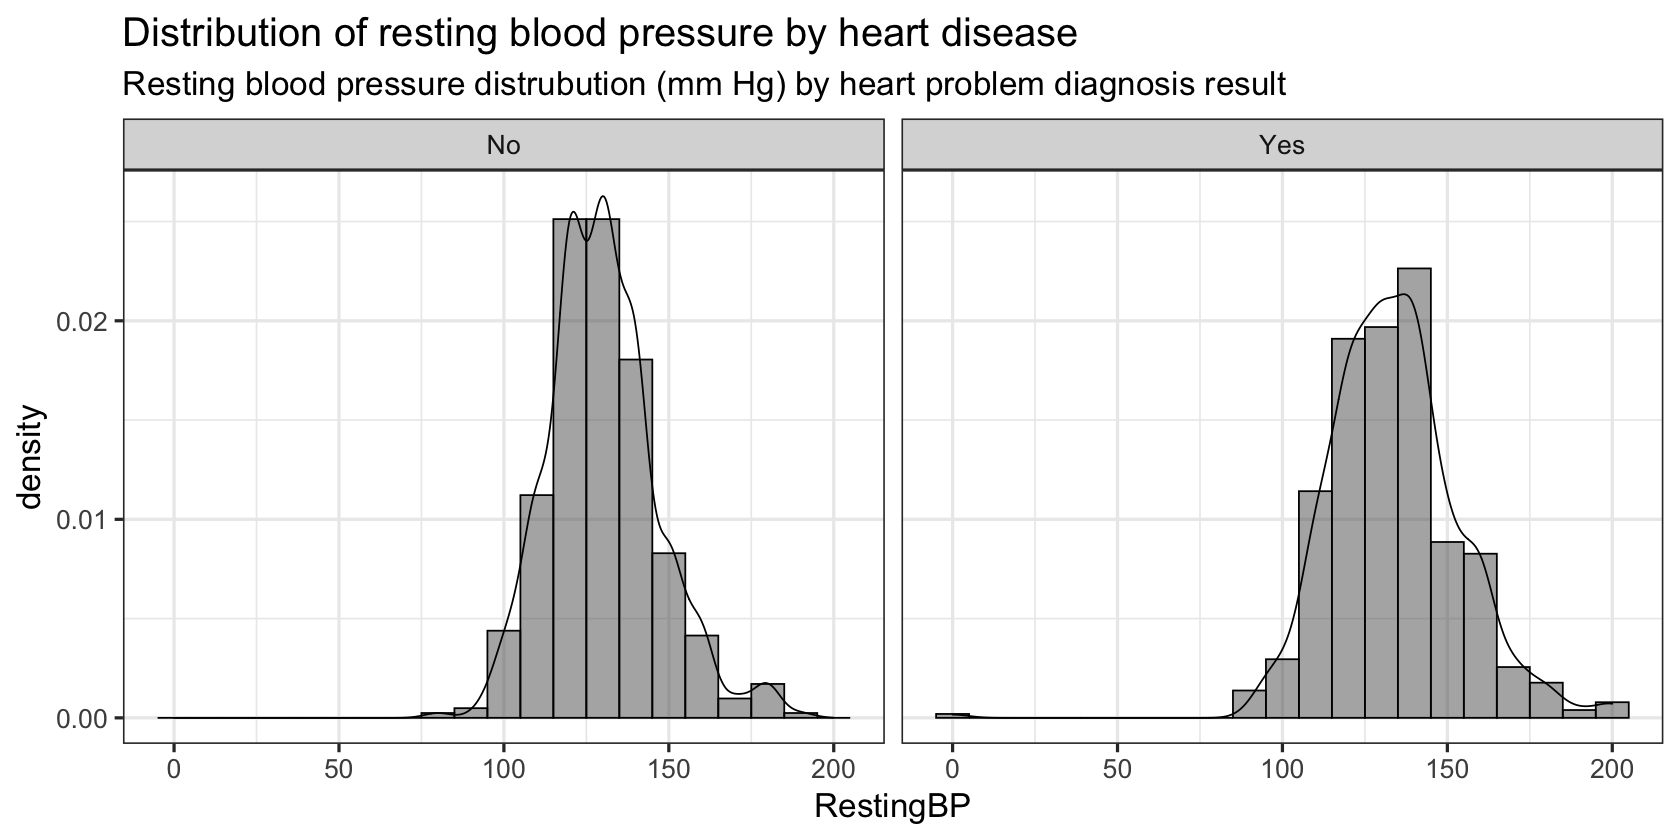

In [8]:
heart %>%
ggplot(mapping = aes(x = RestingBP)) + 
geom_histogram(aes(y = after_stat(density)), binwidth = 10,  color = 'black', alpha = 0.5) + 
geom_density() +
facet_wrap(. ~ HeartDisease) +
ggtitle(
    'Distribution of resting blood pressure by heart disease',
    subtitle = 'Resting blood pressure distrubution (mm Hg) by heart problem diagnosis result'
) +
theme_bw(base_size = 20)

**Observation**
- RestingBP variable is separated by heart disease and divided into intervals of width 10 mm Hg in order to form histogram and density plots
- From the plots after ignoring the outliers in resting blood pressure values,
    - the healthy group RestingBP distribution type is asymmetric right skewed and modality is bimodal (two modes or peaks)
    - the heart disease group RestingBP distribution type is asymmetric right skewed and modality is unimodal (single mode or peak)

### Part 2 : Association analysis
- The purpose is to perform analysis of data relationships and explain the results


### Categorical
- Does gender of person have relationship with his/her heart diagnosis result ?

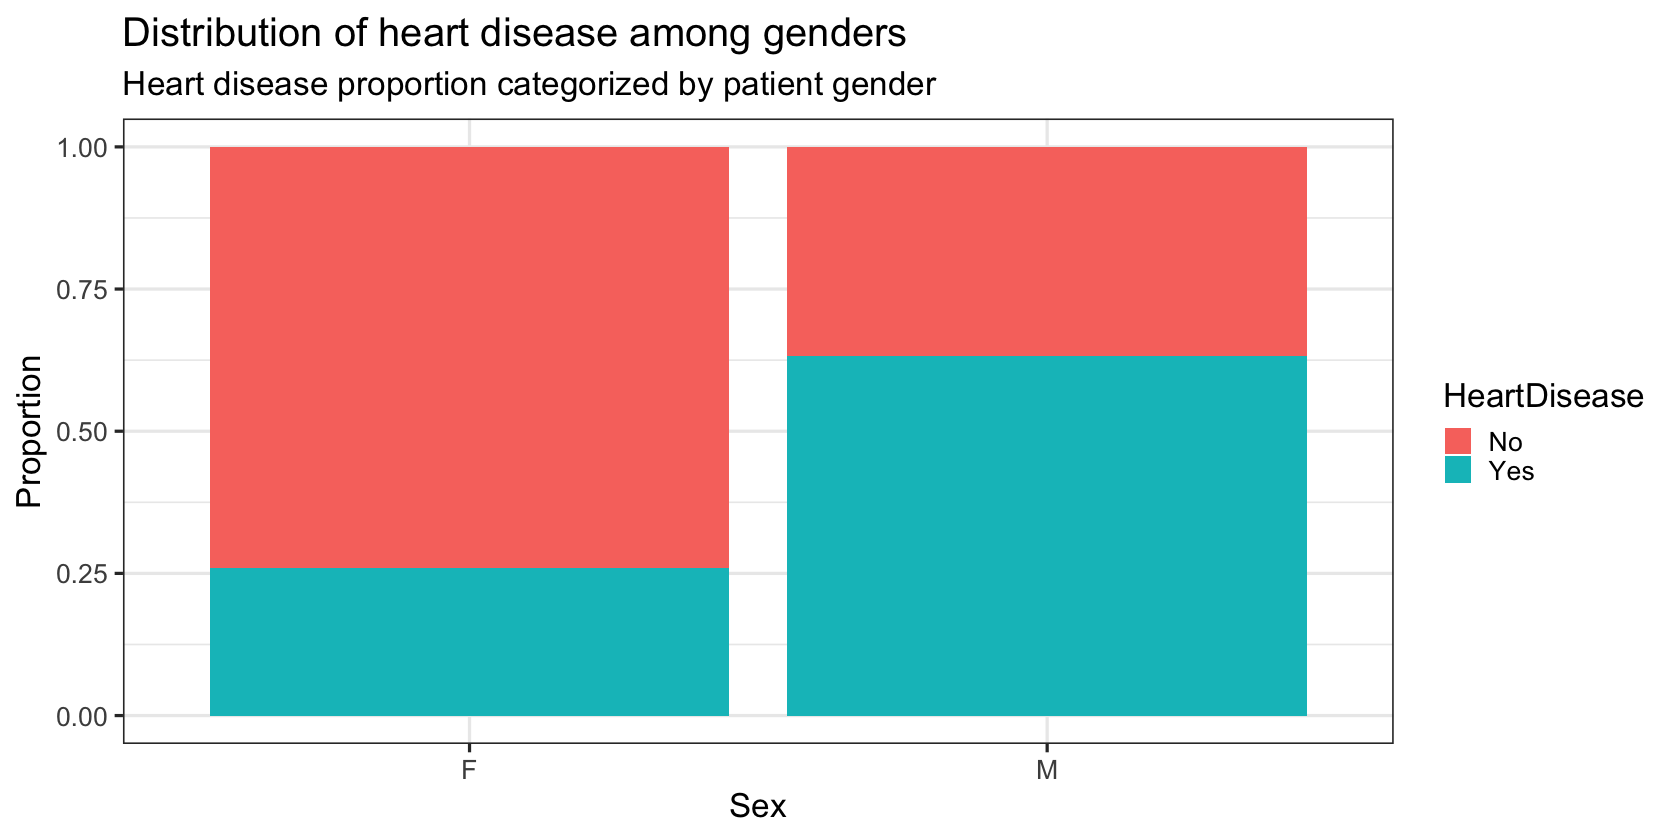

In [9]:
heart %>%
ggplot(mapping = aes(x = Sex, fill = HeartDisease)) + 
geom_bar(position = 'fill') +
ylab('Proportion') +
ggtitle(
    'Distribution of heart disease among genders',
    subtitle = 'Heart disease proportion categorized by patient gender'
) +
theme_bw(base_size = 20)

In [10]:
chisq.test(table(heart$Sex, heart$HeartDisease))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(heart$Sex, heart$HeartDisease)
X-squared = 84.145, df = 1, p-value < 2.2e-16


**Observation**
- From the bar chart, it looks clear that heart disease is more common in men but to be more sure about what we observed, we will perform chi-square test
- From the chi-square test, we get very low p-value which indicates there is relationship between gender and heart disease

- Is exercise angina linked with chest pain type ?

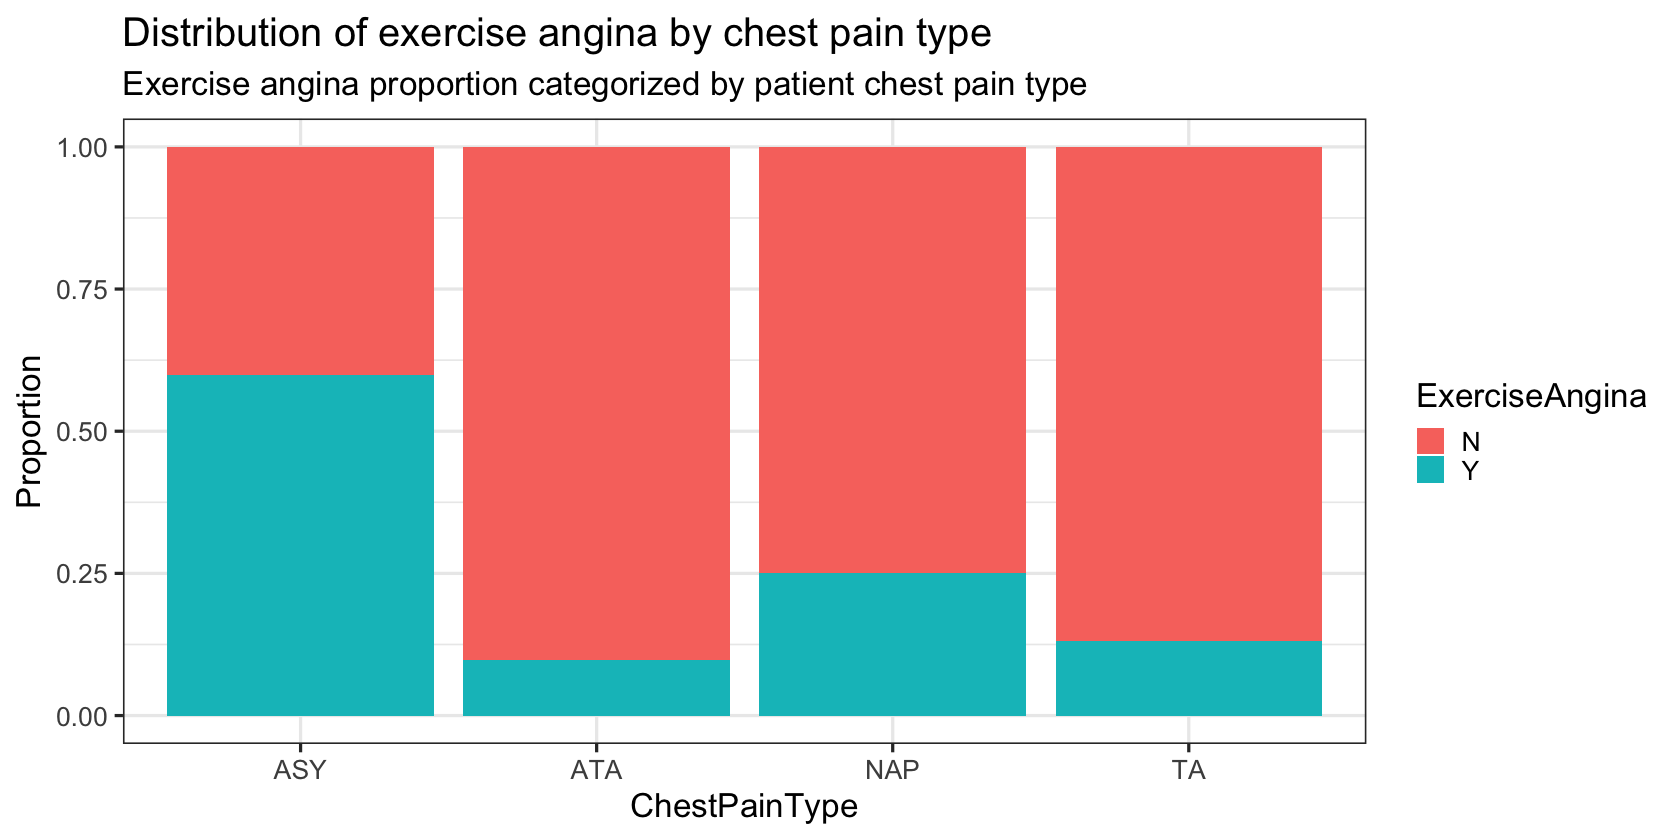

In [11]:
heart %>%
ggplot(mapping = aes(x = ChestPainType, fill = ExerciseAngina)) + 
geom_bar(position = 'fill') +
ylab('Proportion') +
ggtitle(
    'Distribution of exercise angina by chest pain type',
    subtitle = 'Exercise angina proportion categorized by patient chest pain type'
) +
theme_bw(base_size = 20)

In [12]:
chisq.test(table(heart$ChestPainType, heart$ExerciseAngina))


	Pearson's Chi-squared test

data:  table(heart$ChestPainType, heart$ExerciseAngina)
X-squared = 179.27, df = 3, p-value < 2.2e-16


**Observation**
- The bar chart tells that having excercise angina is most common for `ASY` chest pain type but to verify the assumption, again we conduct chi-square test
- Clearly from the test, seeing excercise angina pervasive in patients with `ASY` type chest pain is not by chance and there is association between type of chest pain and excercise angina

### Numerical

- What type of relationship variables have with each other ?

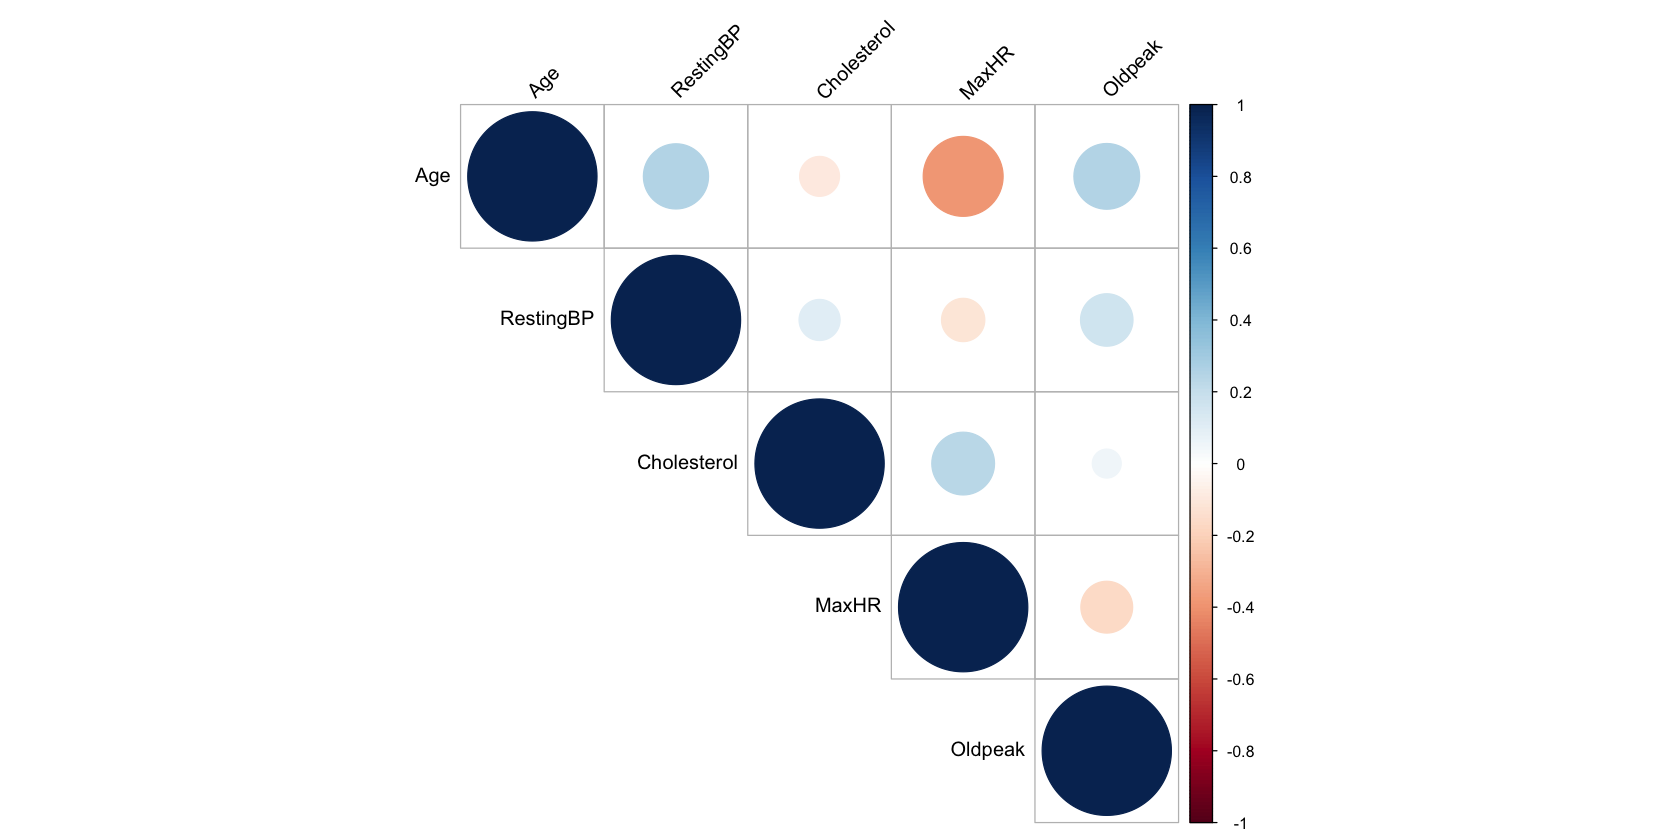

In [13]:
heart %>%
select_if(is.numeric) %>%
select(-FastingBS) %>%
cor() %>%
corrplot(
    type = 'upper', 
    tl.col = 'black', 
    tl.srt = 45
)

**Observation**
- The red circles in corrplot show negative correlation while the blue circles in the plot show positive correlation between columns. The numerical columns here in data have low correlation with each other (light color circles). The most negatively correlated numeric column pair is `Age` and `MaxHR`, whereas the most postively associated columns are `Age` and `Oldpeak`

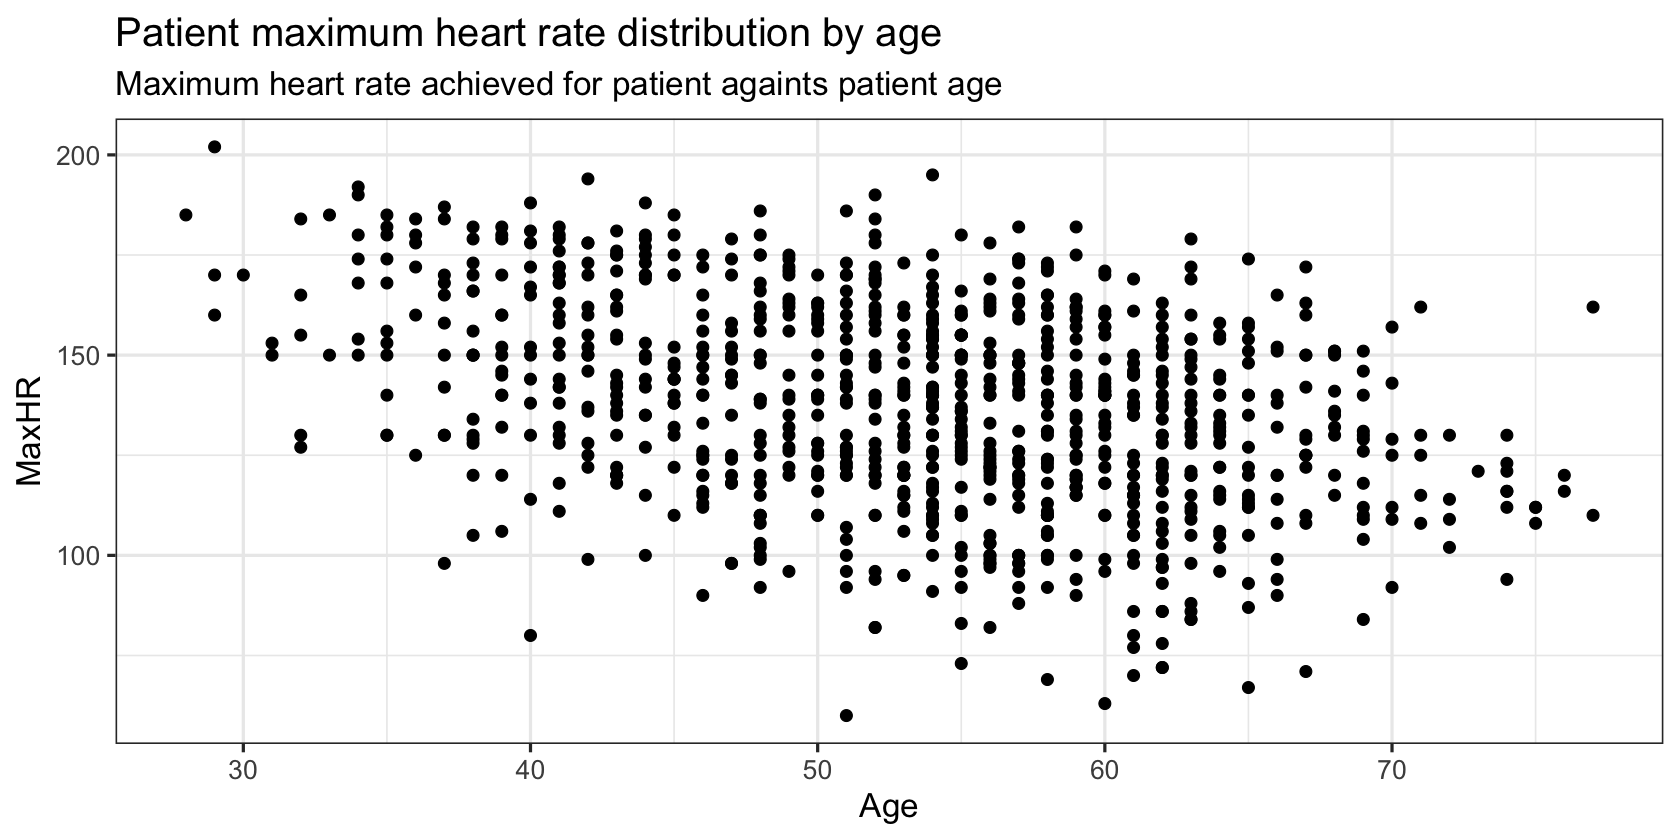

In [14]:
heart %>%
ggplot(mapping = aes(x = Age, y = MaxHR)) +
geom_point(size = 3) +
ggtitle(
    'Patient maximum heart rate distribution by age', 
    subtitle = 'Maximum heart rate achieved for patient againts patient age'
) +
theme_bw(base_size = 20)

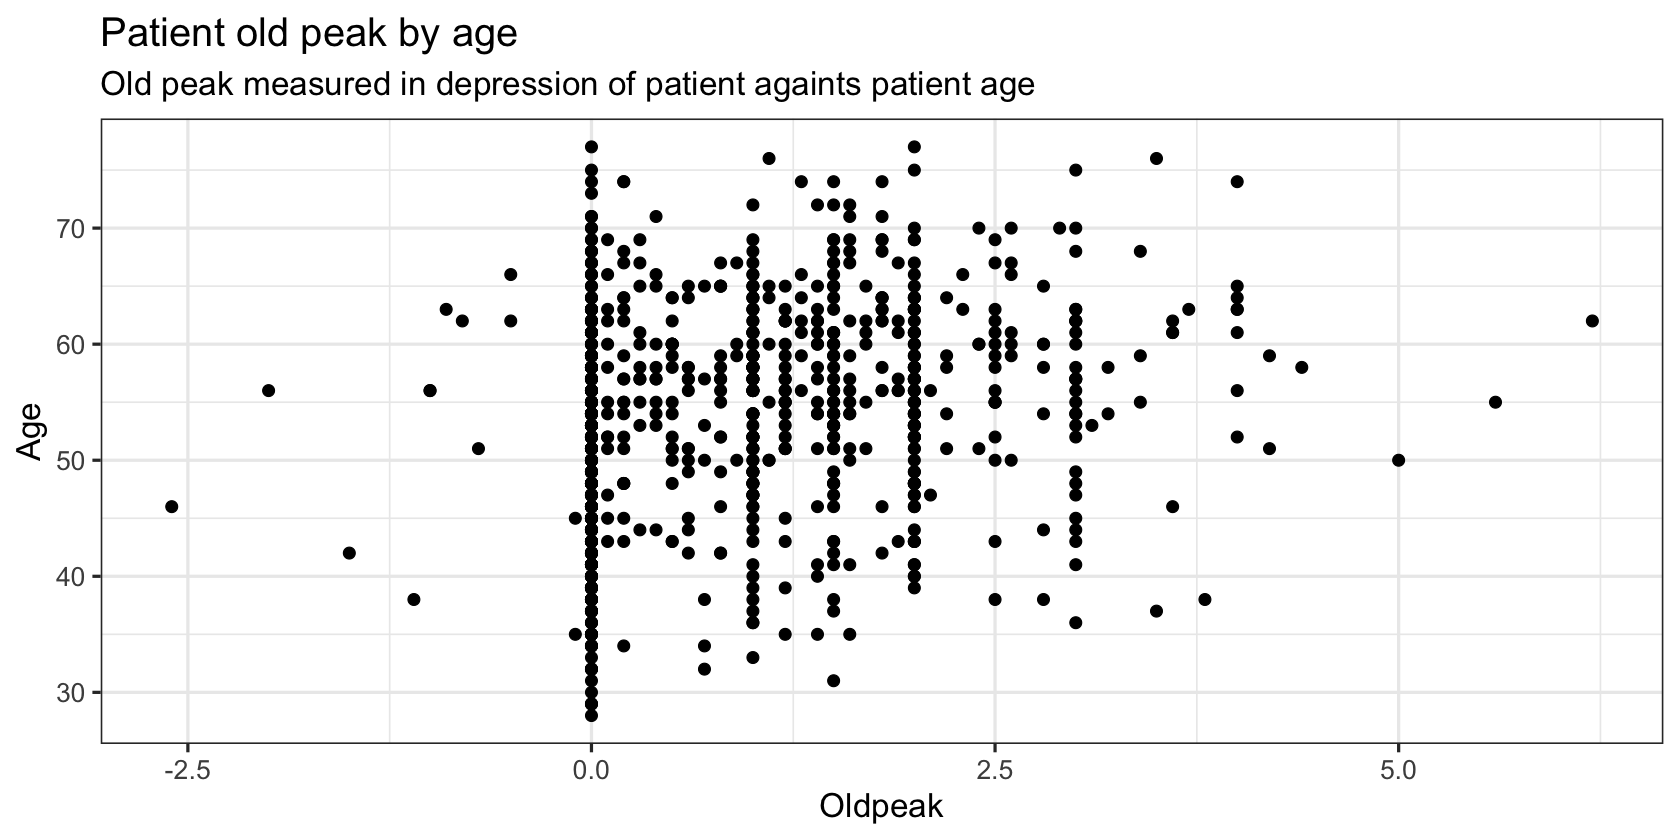

In [15]:
heart %>%
ggplot(mapping = aes(x = Oldpeak, y = Age)) +
geom_point(size = 3) +
ggtitle('Patient old peak by age', subtitle = 'Old peak measured in depression of patient againts patient age') + 
theme_bw(base_size = 20)

**Observation**
- The scatter plot between patient maximum heart rate (`MaxHR`) and patient age show us more obvious trend (due to stronger correlation) that lower maximum heart rate is achieved for older patients. Visually, it is ambiguous to conclude the direction of relationship between patients' oldpeak and their age due to weak correlation